In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler,QuantileTransformer,PowerTransformer

Loading the dataset

In [3]:
data=pd.read_csv('kc_house_data.csv')
pd.set_option('display.max_columns',None)
data


id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
0             1180      5650     1.0           0     0          3      7   
1             2570      7242     2.0           0     0          3      7   
2              770     10000     1.0           0     0          3      6   
3             1960      5000     1.0           0     0          5      7   
4             1680      8080     1.0           0     0          3      8   
...            ...       ...     ...         ...   ...        ...    ...   
21608         1530      1131     3.0           0     0          3      8   
21609         2310      5813     2.0           0     0          3      8   
21610         1020      1350     2.0           0     0          3      7   
21611         1600      2388     2.0           0     0          3      8   
21612         1020      1076     2.0           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

Data preprocessing

In [4]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
data_prep=data.drop(['id','date'],axis=1)
data_prep

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50         1530      1131     3.0   
21609  400000.0         4       2.50         2310      5813     2.0   
21610  402101.0         2       0.75         1020      1350     2.0   
21611  400000.0         3       2.50         1600      2388     2.0   
21612  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
1               0     0          3      7        2170            400   
2               0     0          3      6         770              0   
3               0     0          5      7        1050            910   
4               0     0          3      8        1680              0   
...           ...   ...        ...    ...         ...            ...   
21608           0     0          3      8        1530              0   
21609           0     0          3      8        2310              0   
21610           0     0          3      7        1020              0   
21611           0     0          3      8        1600              0   
21612           0     0          3      7        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955             0    98178  47.5112 -122.257           1340   
1          1951          1991    98125  47.7210 -122.319           1690   
2          1933             0    98028  47.7379 -122.233           2720   
3          1965             0    98136  47.5208 -122.393           1360   
4          1987             0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21608      2009             0    98103  47.6993 -122.346           1530   
21609      2014             0    98146  47.5107 -122.362           1830   
21610      2009             0    98144  47.5944 -122.299           1020   
21611      2004             0    98027  47.5345 -122.069           1410   
21612      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
1            7639  
2            8062  
3            5000  
4            7503  
...           ...  
21608        1509  
21609        7200  
21610        2007  
21611        1287  
21612        1357  

[21613 rows x 19 columns]

In [6]:
data_prep.drop_duplicates()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50         1530      1131     3.0   
21609  400000.0         4       2.50         2310      5813     2.0   
21610  402101.0         2       0.75         1020      1350     2.0   
21611  400000.0         3       2.50         1600      2388     2.0   
21612  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
1               0     0          3      7        2170            400   
2               0     0          3      6         770              0   
3               0     0          5      7        1050            910   
4               0     0          3      8        1680              0   
...           ...   ...        ...    ...         ...            ...   
21608           0     0          3      8        1530              0   
21609           0     0          3      8        2310              0   
21610           0     0          3      7        1020              0   
21611           0     0          3      8        1600              0   
21612           0     0          3      7        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955             0    98178  47.5112 -122.257           1340   
1          1951          1991    98125  47.7210 -122.319           1690   
2          1933             0    98028  47.7379 -122.233           2720   
3          1965             0    98136  47.5208 -122.393           1360   
4          1987             0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21608      2009             0    98103  47.6993 -122.346           1530   
21609      2014             0    98146  47.5107 -122.362           1830   
21610      2009             0    98144  47.5944 -122.299           1020   
21611      2004             0    98027  47.5345 -122.069           1410   
21612      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
1            7639  
2            8062  
3            5000  
4            7503  
...           ...  
21608        1509  
21609        7200  
21610        2007  
21611        1287  
21612        1357  

[21608 rows x 19 columns]

In [7]:
data_prep.describe().round(2)


price  bedrooms  bathrooms  sqft_living    sqft_lot    floors  \
count    21613.00  21613.00   21613.00     21613.00    21613.00  21613.00   
mean    540088.14      3.37       2.11      2079.90    15106.97      1.49   
std     367127.20      0.93       0.77       918.44    41420.51      0.54   
min      75000.00      0.00       0.00       290.00      520.00      1.00   
25%     321950.00      3.00       1.75      1427.00     5040.00      1.00   
50%     450000.00      3.00       2.25      1910.00     7618.00      1.50   
75%     645000.00      4.00       2.50      2550.00    10688.00      2.00   
max    7700000.00     33.00       8.00     13540.00  1651359.00      3.50   

       waterfront      view  condition     grade  sqft_above  sqft_basement  \
count    21613.00  21613.00   21613.00  21613.00    21613.00       21613.00   
mean         0.01      0.23       3.41      7.66     1788.39         291.51   
std          0.09      0.77       0.65      1.18      828.09         442.58   
min          0.00      0.00       1.00      1.00      290.00           0.00   
25%          0.00      0.00       3.00      7.00     1190.00           0.00   
50%          0.00      0.00       3.00      7.00     1560.00           0.00   
75%          0.00      0.00       4.00      8.00     2210.00         560.00   
max          1.00      4.00       5.00     13.00     9410.00        4820.00   

       yr_built  yr_renovated   zipcode       lat      long  sqft_living15  \
count  21613.00      21613.00  21613.00  21613.00  21613.00       21613.00   
mean    1971.01         84.40  98077.94     47.56   -122.21        1986.55   
std       29.37        401.68     53.51      0.14      0.14         685.39   
min     1900.00          0.00  98001.00     47.16   -122.52         399.00   
25%     1951.00          0.00  98033.00     47.47   -122.33        1490.00   
50%     1975.00          0.00  98065.00     47.57   -122.23        1840.00   
75%     1997.00          0.00  98118.00     47.68   -122.12        2360.00   
max     2015.00       2015.00  98199.00     47.78   -121.32        6210.00   

       sqft_lot15  
count    21613.00  
mean     12768.46  
std      27304.18  
min        651.00  
25%       5100.00  
50%       7620.00  
75%      10083.00  
max     871200.00

In [8]:
def outlier(df,variable,weight):
    iqr=df[variable].quantile(0.75)-df[variable].quantile(0.25)
    lower=df[variable].quantile(0.25)-(iqr*weight)
    upper=df[variable].quantile(0.75)+(iqr*weight)
    df=df[(df[variable]>lower)&(df[variable]<upper)]
    
    return df

x=data_prep
x=outlier(x,'price',1.5)
x=outlier(x,'sqft_living',1.5)
x=outlier(x,'bedrooms',1.5)

data_cleaned=x
data_cleaned.describe().round(2)

price  bedrooms  bathrooms  sqft_living    sqft_lot    floors  \
count    19687.00  19687.00   19687.00     19687.00    19687.00  19687.00   
mean    471285.22      3.30       2.03      1936.36    13972.26      1.47   
std     202667.65      0.78       0.68       702.29    37888.65      0.54   
min      78000.00      2.00       0.50       440.00      520.00      1.00   
25%     315000.00      3.00       1.50      1400.00     5000.00      1.00   
50%     435000.00      3.00       2.00      1840.00     7488.00      1.00   
75%     595000.00      4.00       2.50      2390.00    10200.00      2.00   
max    1127000.00      5.00       4.75      3970.00  1651359.00      3.50   

       waterfront      view  condition     grade  sqft_above  sqft_basement  \
count    19687.00  19687.00   19687.00  19687.00    19687.00       19687.00   
mean         0.00      0.17       3.41      7.51     1679.50         256.86   
std          0.05      0.63       0.65      0.99      676.27         391.81   
min          0.00      0.00       1.00      4.00      440.00           0.00   
25%          0.00      0.00       3.00      7.00     1170.00           0.00   
50%          0.00      0.00       3.00      7.00     1510.00           0.00   
75%          0.00      0.00       4.00      8.00     2060.00         500.00   
max          1.00      4.00       5.00     11.00     3970.00        1990.00   

       yr_built  yr_renovated   zipcode       lat      long  sqft_living15  \
count  19687.00      19687.00  19687.00  19687.00  19687.00       19687.00   
mean    1970.87         72.68  98078.56     47.56   -122.21        1904.73   
std       29.03        373.85     53.42      0.14      0.14         588.60   
min     1900.00          0.00  98001.00     47.16   -122.52         399.00   
25%     1952.00          0.00  98033.00     47.46   -122.33        1470.00   
50%     1974.00          0.00  98065.00     47.57   -122.23        1790.00   
75%     1996.00          0.00  98118.00     47.68   -122.12        2260.00   
max     2015.00       2015.00  98199.00     47.78   -121.32        4950.00   

       sqft_lot15  
count    19687.00  
mean     12034.46  
std      24848.39  
min        651.00  
25%       5040.00  
50%       7510.00  
75%       9794.00  
max     560617.00

<Axes: xlabel='bedrooms', ylabel='price'>

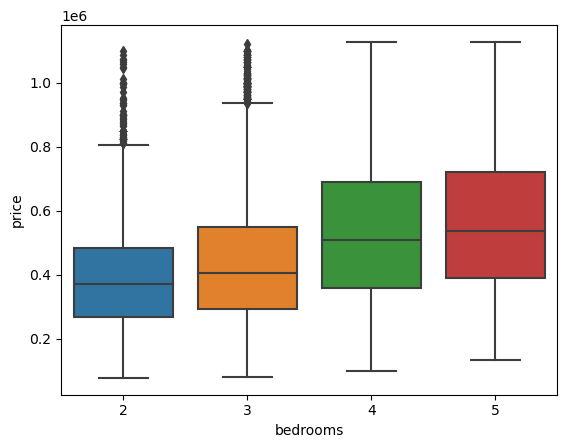

In [11]:
sns.boxplot(data_cleaned,x='bedrooms',y='price')

In [12]:
scaler=StandardScaler().set_output(transform='pandas')
standardized_data=scaler.fit_transform(data_cleaned)

standardized_data.columns=[data_prep.columns]
standardized_data.describe().round(2)


price  bedrooms bathrooms sqft_living  sqft_lot    floors  \
count  19687.00  19687.00  19687.00    19687.00  19687.00  19687.00   
mean       0.00     -0.00      0.00       -0.00     -0.00     -0.00   
std        1.00      1.00      1.00        1.00      1.00      1.00   
min       -1.94     -1.66     -2.27       -2.13     -0.36     -0.88   
25%       -0.77     -0.38     -0.78       -0.76     -0.24     -0.88   
50%       -0.18     -0.38     -0.04       -0.14     -0.17     -0.88   
75%        0.61      0.90      0.70        0.65     -0.10      0.98   
max        3.24      2.17      4.03        2.90     43.22      3.78   

      waterfront      view condition     grade sqft_above sqft_basement  \
count   19687.00  19687.00  19687.00  19687.00   19687.00      19687.00   
mean        0.00      0.00     -0.00      0.00       0.00          0.00   
std         1.00      1.00      1.00      1.00       1.00          1.00   
min        -0.05     -0.26     -3.72     -3.54      -1.83         -0.66   
25%        -0.05     -0.26     -0.64     -0.51      -0.75         -0.66   
50%        -0.05     -0.26     -0.64     -0.51      -0.25         -0.66   
75%        -0.05     -0.26      0.91      0.49       0.56          0.62   
max        18.89      6.13      2.45      3.51       3.39          4.42   

       yr_built yr_renovated   zipcode       lat      long sqft_living15  \
count  19687.00     19687.00  19687.00  19687.00  19687.00      19687.00   
mean       0.00        -0.00      0.00      0.00      0.00          0.00   
std        1.00         1.00      1.00      1.00      1.00          1.00   
min       -2.44        -0.19     -1.45     -2.83     -2.15         -2.56   
25%       -0.65        -0.19     -0.85     -0.70     -0.82         -0.74   
50%        0.11        -0.19     -0.25      0.07     -0.13         -0.19   
75%        0.87        -0.19      0.74      0.87      0.64          0.60   
max        1.52         5.20      2.25      1.56      6.35          5.17   

      sqft_lot15  
count   19687.00  
mean       -0.00  
std         1.00  
min        -0.46  
25%        -0.28  
50%        -0.18  
75%        -0.09  
max        22.08

In [13]:
transformer=PowerTransformer(method='yeo-johnson').set_output(transform='pandas')
transformed_data=transformer.fit_transform(standardized_data)
#transformed_data=pd.DataFrame(transformed_data)
transformed_data.columns=[data_prep.columns]
transformed_data.describe().round(2)


price  bedrooms bathrooms sqft_living  sqft_lot    floors  \
count  19687.00  19687.00  19687.00    19687.00  19687.00  19687.00   
mean       0.00      0.00      0.00        0.00     -0.00      0.00   
std        1.00      1.00      1.00        1.00      1.00      1.00   
min       -2.70     -1.77     -2.22       -2.70     -2.16     -0.93   
25%       -0.77     -0.34     -0.79       -0.75     -0.66     -0.93   
50%       -0.01     -0.34     -0.06       -0.01     -0.05     -0.93   
75%        0.75      0.91      0.69        0.73      0.48      1.07   
max        2.35      2.01      4.16        2.33      2.39      2.35   

      waterfront      view condition     grade sqft_above sqft_basement  \
count   19687.00  19687.00  19687.00  19687.00   19687.00      19687.00   
mean        0.00      0.00      0.00     -0.00       0.00         -0.00   
std         1.00      1.00      1.00      1.00       1.00          1.00   
min        -0.05     -0.28     -8.63     -4.53      -2.86         -0.75   
25%        -0.05     -0.28     -0.59     -0.46      -0.77         -0.75   
50%        -0.05     -0.28     -0.59     -0.46      -0.04         -0.75   
75%        -0.05     -0.28      1.05      0.56       0.77          1.18   
max        18.89      3.52      1.88      2.90       2.26          1.86   

       yr_built yr_renovated   zipcode       lat      long sqft_living15  \
count  19687.00     19687.00  19687.00  19687.00  19687.00      19687.00   
mean      -0.00         0.00      0.00      0.00     -0.00          0.00   
std        1.00         1.00      1.00      1.00      1.00          1.00   
min       -2.06        -0.19     -1.65     -2.30     -3.18         -3.88   
25%       -0.73        -0.19     -0.85     -0.77     -0.84         -0.73   
50%       -0.01        -0.19     -0.14     -0.06      0.05         -0.03   
75%        0.87        -0.19      0.81      0.88      0.78          0.74   
max        1.75         5.14      1.93      1.81      3.58          3.24   

      sqft_lot15  
count   19687.00  
mean       -0.00  
std         1.00  
min        -2.40  
25%        -0.66  
50%         0.03  
75%         0.52  
max         2.42

<Axes: ylabel='Count'>

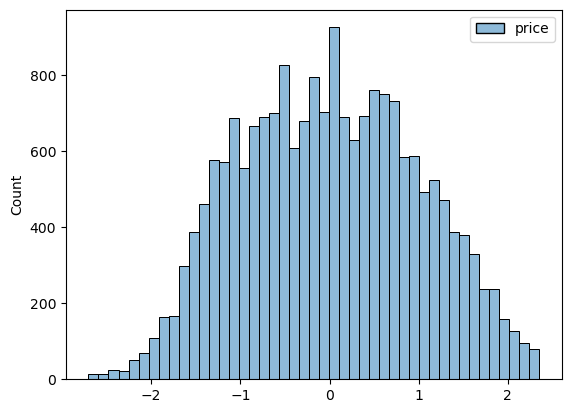

In [14]:
sns.histplot(transformed_data['price'])

<Axes: xlabel='price', ylabel='Count'>

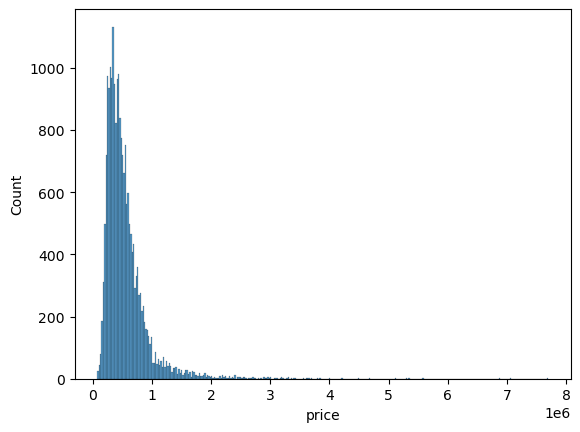

In [15]:
sns.histplot(data_prep,x='price')